In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
from math import isnan
import matplotlib.pyplot as plt
import matplotlib
import datetime
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
collisions = pd.read_csv('bike_coll_rate.csv', low_memory=False)

In [3]:
len(collisions)

21185

In [4]:
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
0,03/24/2017,11:00,BROOKLYN,11235.0,40.587780,-73.95238,"(40.58778,-73.95238)",NaN,NaN,2615 EAST 17 STREET,1,0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3639488,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,156425.0,0.003503,40.59,-73.95
1,03/24/2017,15:45,BROOKLYN,11238.0,40.679420,-73.96823,"(40.67942,-73.96823)",VANDERBILT AVENUE,BERGEN STREET,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3639696,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,9874.0,0.055494,40.68,-73.97
2,03/24/2017,16:50,BRONX,10467.0,40.880780,-73.88347,"(40.88078,-73.88347)",JEROME AVENUE,EAST 208 STREET,NaN,1,0,0,0,1,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638752,BICYCLE,NaN,NaN,NaN,NaN,2909.0,0.188362,40.88,-73.88
3,03/24/2017,18:40,MANHATTAN,10002.0,40.713688,-73.99459,"(40.713688,-73.99459)",EAST BROADWAY,MARKET STREET,NaN,1,0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,3639287,BICYCLE,NaN,NaN,NaN,NaN,24005.0,0.022826,40.71,-73.99
4,03/24/2017,19:05,MANHATTAN,10037.0,40.814670,-73.93623,"(40.81467,-73.93623)",5 AVENUE,EAST 138 STREET,NaN,1,0,1,0,0,0,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,3638488,BICYCLE,NaN,NaN,NaN,NaN,11984.0,0.045723,40.81,-73.94


(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000.]), <a list of 10 Text yticklabel objects>)

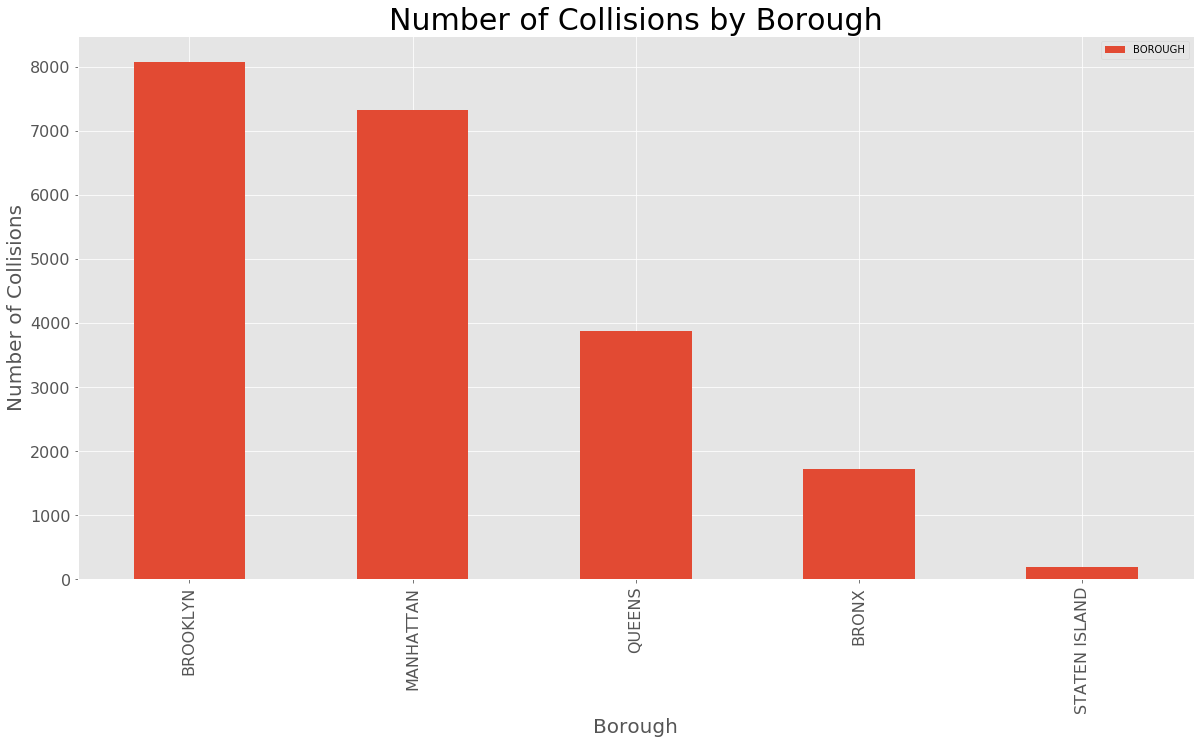

In [12]:
collByBorough = pd.DataFrame(collisions['BOROUGH'])
collByBorough.apply(pd.value_counts).plot(kind='bar')
plt.xlabel('Borough', fontsize=20)
plt.ylabel('Number of Collisions', fontsize=20)
plt.title('Number of Collisions by Borough', fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

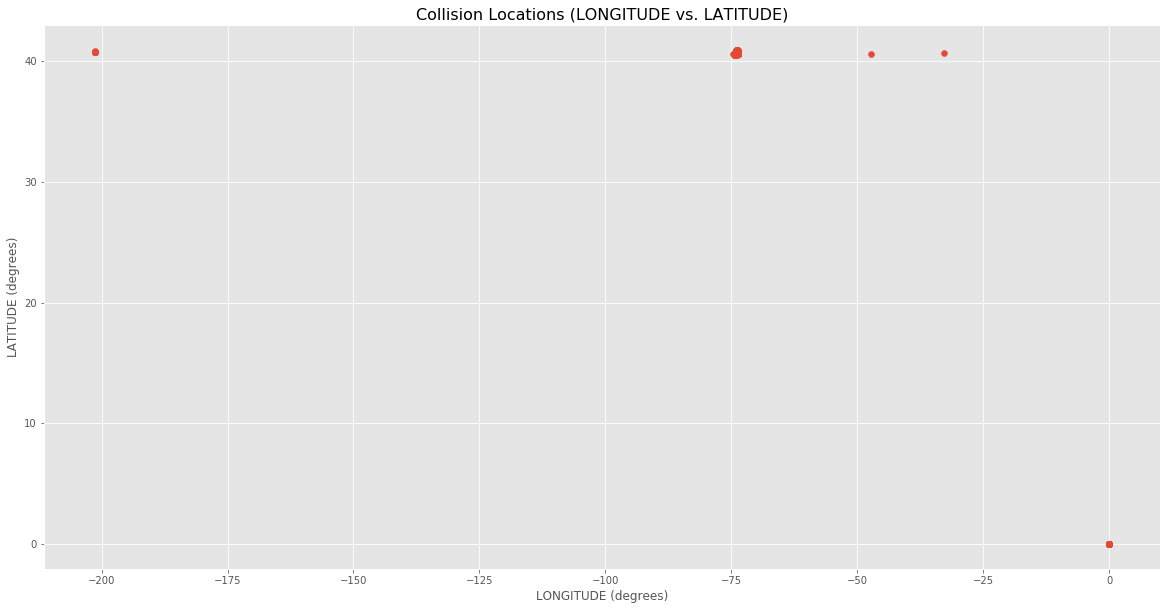

In [79]:
plt.scatter(collisions['LONGITUDE'], collisions['LATITUDE'])
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Collision Locations (LONGITUDE vs. LATITUDE)', fontsize=16)


Note the outliers caused by missing longitude and latitude data.

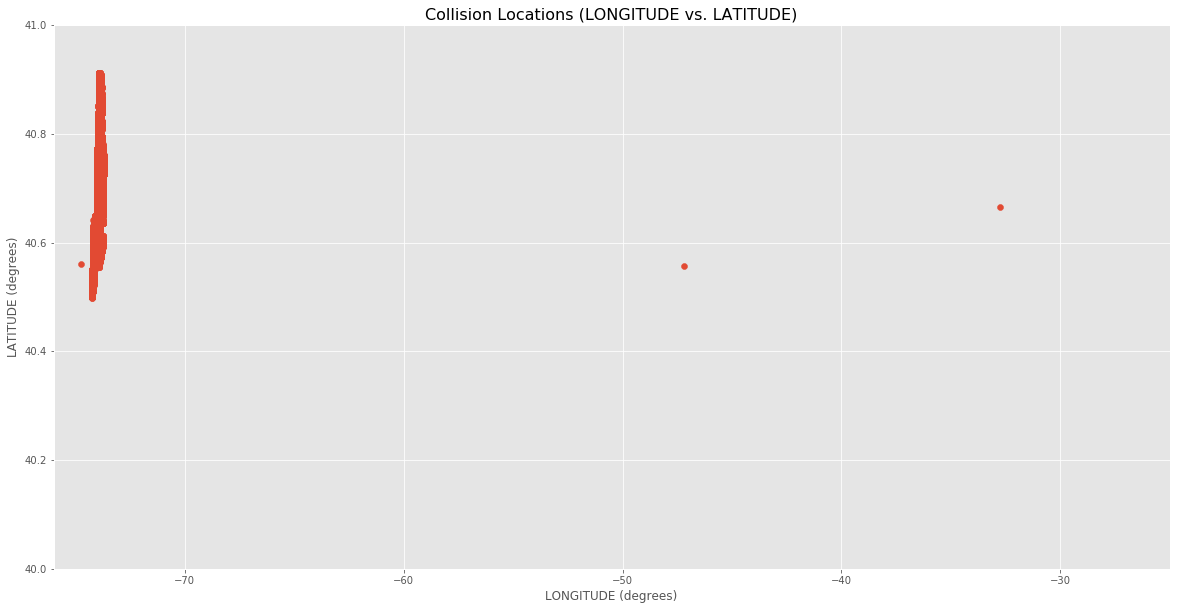

In [80]:
plt.scatter(collisions['LONGITUDE'], collisions['LATITUDE'])
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Collision Locations (LONGITUDE vs. LATITUDE)', fontsize=16)
plt.ylim(40,41)
plt.xlim(-76,-25)
plt.show()

Collision location data begins to make more sense after removing non-data.  There are still a couple of outliers to remove.  They are in the middle of the Atlantic Ocean.

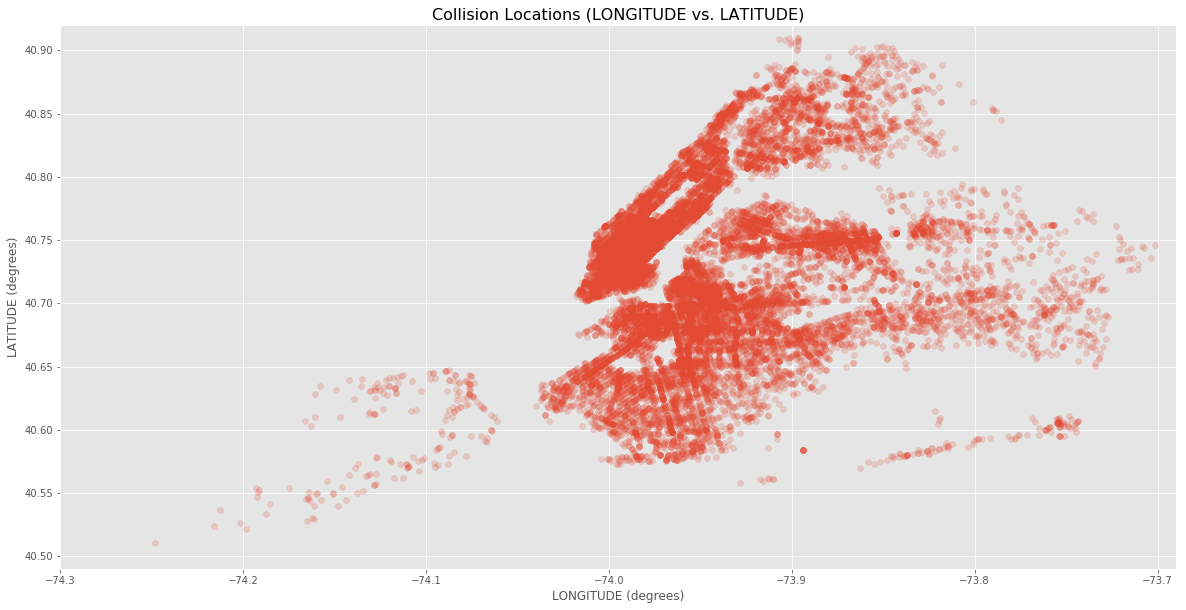

In [9]:
plt.scatter(collisions['LONGITUDE'], collisions['LATITUDE'], alpha=0.2)
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Collision Locations (LONGITUDE vs. LATITUDE)', fontsize=16)
plt.ylim(40.49,40.92)
plt.xlim(-74.3,-73.69)
plt.show()

Zooming in and changing alpha level gives us a nice picture of NYC.

In [81]:
#Change 'TIME' column to display only the hour
timeData = collisions.drop(collisions.columns[3:10], axis=1)
timeData = test.drop(test.columns[11:], axis=1)
for x in range(0,1002838):
    time = timeData.at[x,'TIME']
    (h, m) = time.split(':')
    timeData.set_value(x, 'TIME', int(h))

In [86]:
#Aggregate the number of injuries/deaths per hour for Bronx
injuriesBronx = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
deathsBronx = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
for x in range(0,1002838):
    if(timeData.at[x, 'BOROUGH'] == 'BRONX'):
        key = timeData.at[x,'TIME']
        inj = timeData.at[x, 'NUMBER OF PERSONS INJURED']
        deaths = timeData.at[x, 'NUMBER OF PERSONS KILLED']
        injuriesBronx[key] += inj
        deathsBronx[key] += deaths

In [115]:
#Create DataFrame of injuries/deaths per hour for Bronx
col = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

injuriesPerHrBronx = pd.DataFrame(injuriesBronx, injuriesBronx.values())
injuriesPerHrBronx = injuriesPerHrBronx.transpose()
injuriesPerHrBronx.columns = col
injuriesPerHrBronx = injuriesPerHrBronx.drop(injuriesPerHrBronx.columns[1:], axis=1)
injuriesPerHrBronx.columns = ['Injuries']

deathsPerHrBronx = pd.DataFrame(deathsBronx, deathsBronx.values())
deathsPerHrBronx = deathsPerHrBronx.transpose()
deathsPerHrBronx.columns = col
deathsPerHrBronx = deathsPerHrBronx.drop(deathsPerHrBronx.columns[1:], axis=1)
deathsPerHrBronx.columns = ['Deaths']

In [123]:
#Aggregate the number of injuries/deaths per hour for Brooklyn
injuriesBrooklyn = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
deathsBrooklyn = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
for x in range(0,1002838):
    if(timeData.at[x, 'BOROUGH'] == 'BROOKLYN'):
        key = timeData.at[x,'TIME']
        inj = timeData.at[x, 'NUMBER OF PERSONS INJURED']
        deaths = timeData.at[x, 'NUMBER OF PERSONS KILLED']
        injuriesBrooklyn[key] += inj
        deathsBrooklyn[key] += deaths

In [126]:
#Create DataFrame of injuries/deaths per hour for Brooklyn
col = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

injuriesPerHrBrooklyn = pd.DataFrame(injuriesBrooklyn, injuriesBrooklyn.values())
injuriesPerHrBrooklyn = injuriesPerHrBrooklyn.transpose()
injuriesPerHrBrooklyn.columns = col
injuriesPerHrBrooklyn = injuriesPerHrBrooklyn.drop(injuriesPerHrBrooklyn.columns[1:], axis=1)
injuriesPerHrBrooklyn.columns = ['Injuries']

deathsPerHrBrooklyn = pd.DataFrame(deathsBrooklyn, deathsBrooklyn.values())
deathsPerHrBrooklyn = deathsPerHrBrooklyn.transpose()
deathsPerHrBrooklyn.columns = col
deathsPerHrBrooklyn = deathsPerHrBrooklyn.drop(deathsPerHrBrooklyn.columns[1:], axis=1)
deathsPerHrBrooklyn.columns = ['Deaths']

In [129]:
#Aggregate the number of injuries/deaths per hour for Manhattan
injuriesManhattan = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
deathsManhattan = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
for x in range(0,1002838):
    if(timeData.at[x, 'BOROUGH'] == 'MANHATTAN'):
        key = timeData.at[x,'TIME']
        inj = timeData.at[x, 'NUMBER OF PERSONS INJURED']
        deaths = timeData.at[x, 'NUMBER OF PERSONS KILLED']
        injuriesManhattan[key] += inj
        deathsManhattan[key] += deaths

In [130]:
#Create DataFrame of injuries/deaths per hour for Manhattan
col = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

injuriesPerHrManhattan = pd.DataFrame(injuriesManhattan, injuriesManhattan.values())
injuriesPerHrManhattan = injuriesPerHrManhattan.transpose()
injuriesPerHrManhattan.columns = col
injuriesPerHrManhattan = injuriesPerHrManhattan.drop(injuriesPerHrManhattan.columns[1:], axis=1)
injuriesPerHrManhattan.columns = ['Injuries']

deathsPerHrManhattan = pd.DataFrame(deathsManhattan, deathsManhattan.values())
deathsPerHrManhattan = deathsPerHrManhattan.transpose()
deathsPerHrManhattan.columns = col
deathsPerHrManhattan = deathsPerHrManhattan.drop(deathsPerHrManhattan.columns[1:], axis=1)
deathsPerHrManhattan.columns = ['Deaths']

In [133]:
#Aggregate the number of injuries/deaths per hour for Queens
injuriesQueens = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
deathsQueens = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
for x in range(0,1002838):
    if(timeData.at[x, 'BOROUGH'] == 'QUEENS'):
        key = timeData.at[x,'TIME']
        inj = timeData.at[x, 'NUMBER OF PERSONS INJURED']
        deaths = timeData.at[x, 'NUMBER OF PERSONS KILLED']
        injuriesQueens[key] += inj
        deathsQueens[key] += deaths

In [134]:
#Create DataFrame of injuries/deaths per hour for Queens
col = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

injuriesPerHrQueens = pd.DataFrame(injuriesQueens, injuriesQueens.values())
injuriesPerHrQueens = injuriesPerHrQueens.transpose()
injuriesPerHrQueens.columns = col
injuriesPerHrQueens = injuriesPerHrQueens.drop(injuriesPerHrQueens.columns[1:], axis=1)
injuriesPerHrQueens.columns = ['Injuries']

deathsPerHrQueens = pd.DataFrame(deathsQueens, deathsQueens.values())
deathsPerHrQueens = deathsPerHrQueens.transpose()
deathsPerHrQueens.columns = col
deathsPerHrQueens = deathsPerHrQueens.drop(deathsPerHrQueens.columns[1:], axis=1)
deathsPerHrQueens.columns = ['Deaths']

In [138]:
#Aggregate the number of injuries/deaths per hour for Staten Island
injuriesStIsl = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
deathsStIsl = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
for x in range(0,1002838):
    if(timeData.at[x, 'BOROUGH'] == 'STATEN ISLAND'):
        key = timeData.at[x,'TIME']
        inj = timeData.at[x, 'NUMBER OF PERSONS INJURED']
        deaths = timeData.at[x, 'NUMBER OF PERSONS KILLED']
        injuriesStIsl[key] += inj
        deathsStIsl[key] += deaths

In [139]:
#Create DataFrame of injuries/deaths per hour for Staten Island
col = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

injuriesPerHrStIsl = pd.DataFrame(injuriesStIsl, injuriesStIsl.values())
injuriesPerHrStIsl = injuriesPerHrStIsl.transpose()
injuriesPerHrStIsl.columns = col
injuriesPerHrStIsl = injuriesPerHrStIsl.drop(injuriesPerHrStIsl.columns[1:], axis=1)
injuriesPerHrStIsl.columns = ['Injuries']

deathsPerHrStIsl = pd.DataFrame(deathsStIsl, deathsStIsl.values())
deathsPerHrStIsl = deathsPerHrStIsl.transpose()
deathsPerHrStIsl.columns = col
deathsPerHrStIsl = deathsPerHrStIsl.drop(deathsPerHrStIsl.columns[1:], axis=1)
deathsPerHrStIsl.columns = ['Deaths']

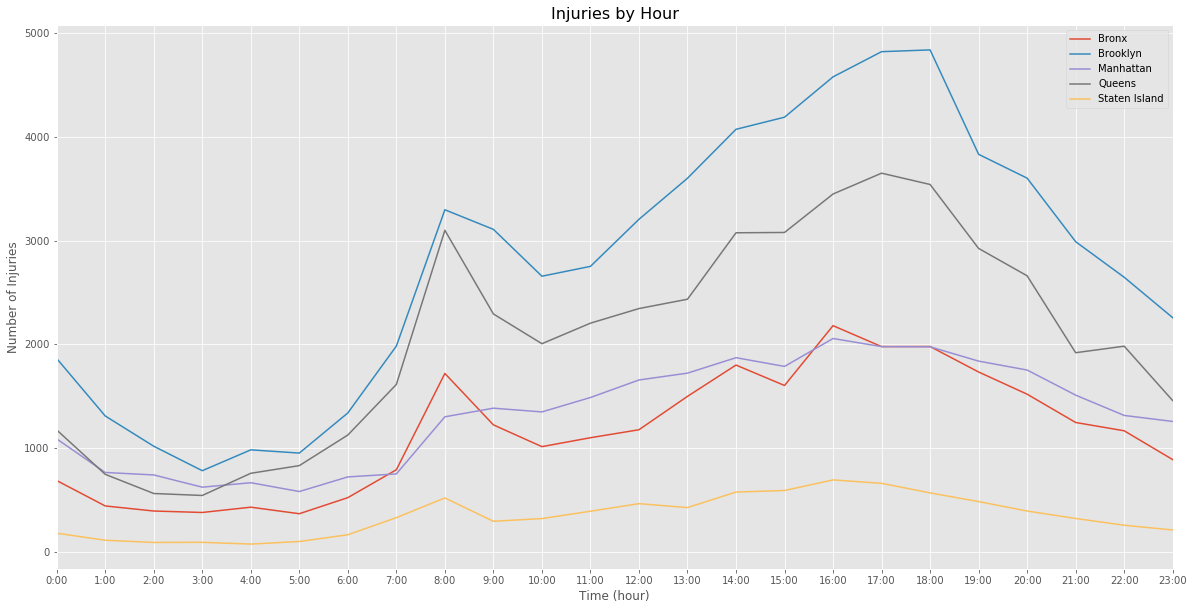

In [140]:
labels = ['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00']
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.plot(injuriesPerHrBronx, label='Bronx')
plt.plot(injuriesPerHrBrooklyn, label='Brooklyn')
plt.plot(injuriesPerHrManhattan, label='Manhattan')
plt.plot(injuriesPerHrQueens, label='Queens')
plt.plot(injuriesPerHrStIsl, label='Staten Island')
plt.xticks(x,labels)
plt.xlim(0,23)
plt.title('Injuries by Hour', fontsize=16)
plt.xlabel('Time (hour)', fontsize=12)
plt.ylabel('Number of Injuries', fontsize=12)
plt.legend(loc='best')
plt.show()

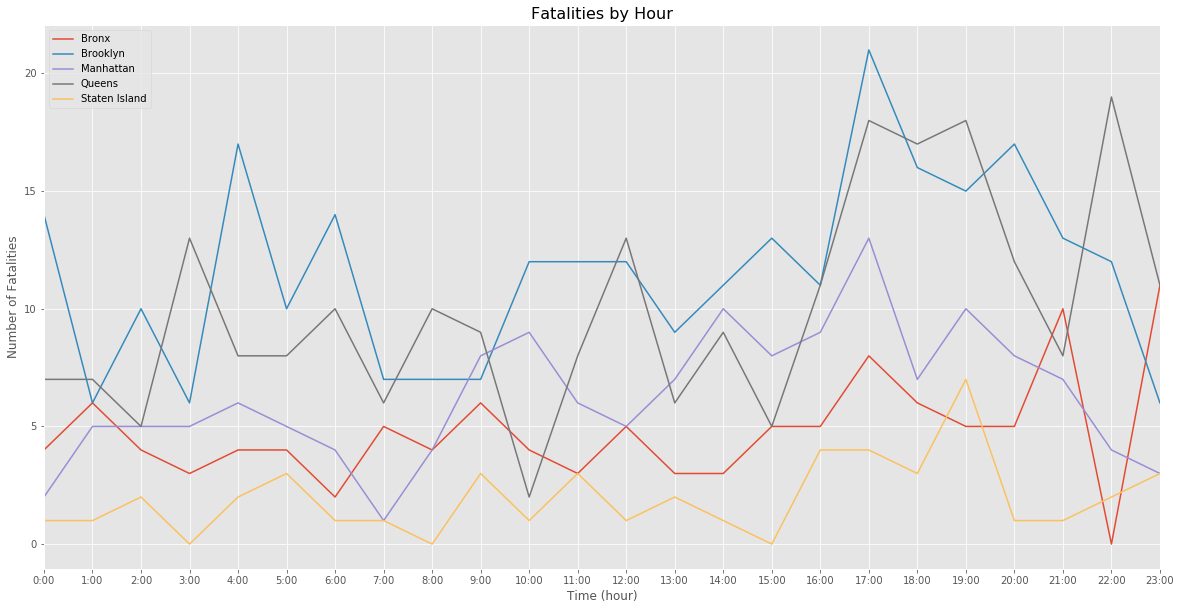

In [141]:
labels = ['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00']
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.plot(deathsPerHrBronx, label='Bronx')
plt.plot(deathsPerHrBrooklyn, label='Brooklyn')
plt.plot(deathsPerHrManhattan, label='Manhattan')
plt.plot(deathsPerHrQueens, label='Queens')
plt.plot(deathsPerHrStIsl, label='Staten Island')
plt.xticks(x,labels)
plt.xlim(0,23)
plt.title('Fatalities by Hour', fontsize=16)
plt.xlabel('Time (hour)', fontsize=12)
plt.ylabel('Number of Fatalities', fontsize=12)
plt.legend(loc='best')
plt.show()

In [39]:
len(collisions.loc[collisions['BOROUGH'].isnull()])

265085